In [1]:
# https://mail.google.com/mail/u/0/#inbox/QgrcJHrnscJGjsRzFLPzmGMZSlGWKMsntRB

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, DROSOPHILA_DIR
import urllib.request

In [4]:
from tqdm.autonotebook import tqdm
import h5py
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
mat_file = list(DROSOPHILA_DIR.glob('*.mat'))[0]
mat_file

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/DROSOPHILA_Data_Dir/transition_data.mat')

In [6]:
ds = scipy.io.loadmat(mat_file.as_posix())

In [7]:
ds.keys()

dict_keys(['__header__', '__version__', '__globals__', 'density', 'transition_states', 'xx', 'peakPoints', 'regionMap'])

In [8]:
ds['transition_states'][0]

array([array([[59],
       [43],
       [11],
       ...,
       [43],
       [40],
       [44]], dtype=uint8)], dtype=object)

In [9]:
states = [np.concatenate(np.concatenate(i)) for i in ds['transition_states']]

In [10]:
states[0]

array([59, 43, 11, ..., 43, 40, 44], dtype=uint8)

In [11]:
len(states[0])

10803

In [12]:
state_lens = [len(i) for i in states]

(array([ 3.,  1.,  6.,  8., 18., 11.,  8.,  3.,  0.,  1.]),
 array([ 7447. ,  8181.3,  8915.6,  9649.9, 10384.2, 11118.5, 11852.8,
        12587.1, 13321.4, 14055.7, 14790. ]),
 <a list of 10 Patch objects>)

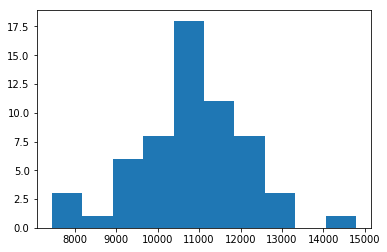

In [13]:
plt.hist(state_lens)

In [43]:
import seaborn as sns
from childes_mi.utils.paths import DATA_DIR, FIGURE_DIR, ensure_dir
from childes_mi.utils.general import flatten,save_fig
ensure_dir(FIGURE_DIR/ 'distributions')

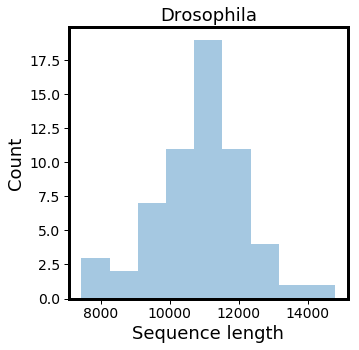

In [46]:
sns.set_context("paper", rc={"font.size":24,"axes.titlesize":18,"axes.labelsize":18})   

fig, ax = plt.subplots(figsize=(5,5));
p = sns.distplot(state_lens, kde=False, rug=False, ax = ax);
#ax.set_xlim([0,1000])
ax.set_xlabel('Sequence length')
ax.set_title('Drosophila')
ax.set_ylabel('Count')
p.tick_params(labelsize=14)
for sp in ax.spines.items():
    sp[1].set_linewidth(3)  
save_fig(FIGURE_DIR/ 'distributions' / 'drosophila_distribution')
plt.show()

In [22]:
len(np.unique(np.concatenate(states)))

117

In [21]:
len(np.unique(states[0]))

116

In [20]:
np.unique(states[0])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117],
      dtype=uint8)

In [26]:
state_str = ' '.join([str(i) for i in states[0]])
print(state_str)

59 43 11 21 11 51 52 46 52 60 59 65 46 27 32 33 40 52 43 39 43 76 106 76 52 43 9 4 9 21 9 21 11 21 69 59 46 42 52 43 9 21 4 9 10 52 46 80 69 80 84 103 60 43 9 21 4 21 52 69 66 46 52 43 21 43 52 53 60 59 68 46 52 40 52 39 43 21 10 21 43 52 43 52 76 52 31 9 10 9 10 9 4 43 52 48 59 32 65 38 45 52 45 33 46 33 40 52 39 4 43 52 65 53 60 52 43 4 9 4 10 21 51 43 52 53 65 46 55 52 43 21 9 10 21 4 43 40 32 33 49 46 15 33 39 51 4 9 43 52 53 59 65 59 65 45 52 43 52 60 62 65 62 60 52 48 21 9 51 43 52 53 50 46 68 59 50 46 27 69 80 65 68 59 49 57 66 59 65 49 44 41 44 46 48 53 59 66 65 66 59 67 77 60 43 52 59 65 59 69 77 53 55 59 64 54 65 44 46 65 50 65 49 32 59 50 44 49 47 50 65 69 53 52 43 51 21 51 57 39 43 52 65 52 45 65 66 43 53 65 80 53 43 21 39 71 52 43 52 55 66 46 55 53 52 43 52 43 52 60 77 60 67 71 84 106 98 87 84 93 108 93 67 87 67 60 52 53 59 65 59 48 52 39 21 9 11 21 11 31 52 45 65 59 52 43 52 53 59 69 27 46 27 15 32 34 39 43 52 43 52 60 53 59 46 66 27 47 49 35 47 49 1 38 14 38 50 19 25 49 

In [39]:
# print for visualization
n=9
x = list(states[0])
lst = []
for i in range(0,len(x),n):
    lst.append(x[i:i+n])
for l in lst:
    print(' '.join([str(i) for i in l]))

59 43 11 21 11 51 52 46 52
60 59 65 46 27 32 33 40 52
43 39 43 76 106 76 52 43 9
4 9 21 9 21 11 21 69 59
46 42 52 43 9 21 4 9 10
52 46 80 69 80 84 103 60 43
9 21 4 21 52 69 66 46 52
43 21 43 52 53 60 59 68 46
52 40 52 39 43 21 10 21 43
52 43 52 76 52 31 9 10 9
10 9 4 43 52 48 59 32 65
38 45 52 45 33 46 33 40 52
39 4 43 52 65 53 60 52 43
4 9 4 10 21 51 43 52 53
65 46 55 52 43 21 9 10 21
4 43 40 32 33 49 46 15 33
39 51 4 9 43 52 53 59 65
59 65 45 52 43 52 60 62 65
62 60 52 48 21 9 51 43 52
53 50 46 68 59 50 46 27 69
80 65 68 59 49 57 66 59 65
49 44 41 44 46 48 53 59 66
65 66 59 67 77 60 43 52 59
65 59 69 77 53 55 59 64 54
65 44 46 65 50 65 49 32 59
50 44 49 47 50 65 69 53 52
43 51 21 51 57 39 43 52 65
52 45 65 66 43 53 65 80 53
43 21 39 71 52 43 52 55 66
46 55 53 52 43 52 43 52 60
77 60 67 71 84 106 98 87 84
93 108 93 67 87 67 60 52 53
59 65 59 48 52 39 21 9 11
21 11 31 52 45 65 59 52 43
52 53 59 69 27 46 27 15 32
34 39 43 52 43 52 60 53 59
46 66 27 47 49 35 47 49 1
38 14 38 50 19 25 49 